<a href="https://colab.research.google.com/github/sosnes/KARAMOJA-PROJECT/blob/master/Sosnes_onduru_Karamoja_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***KARAMOJA END PHASE PROJECCT***

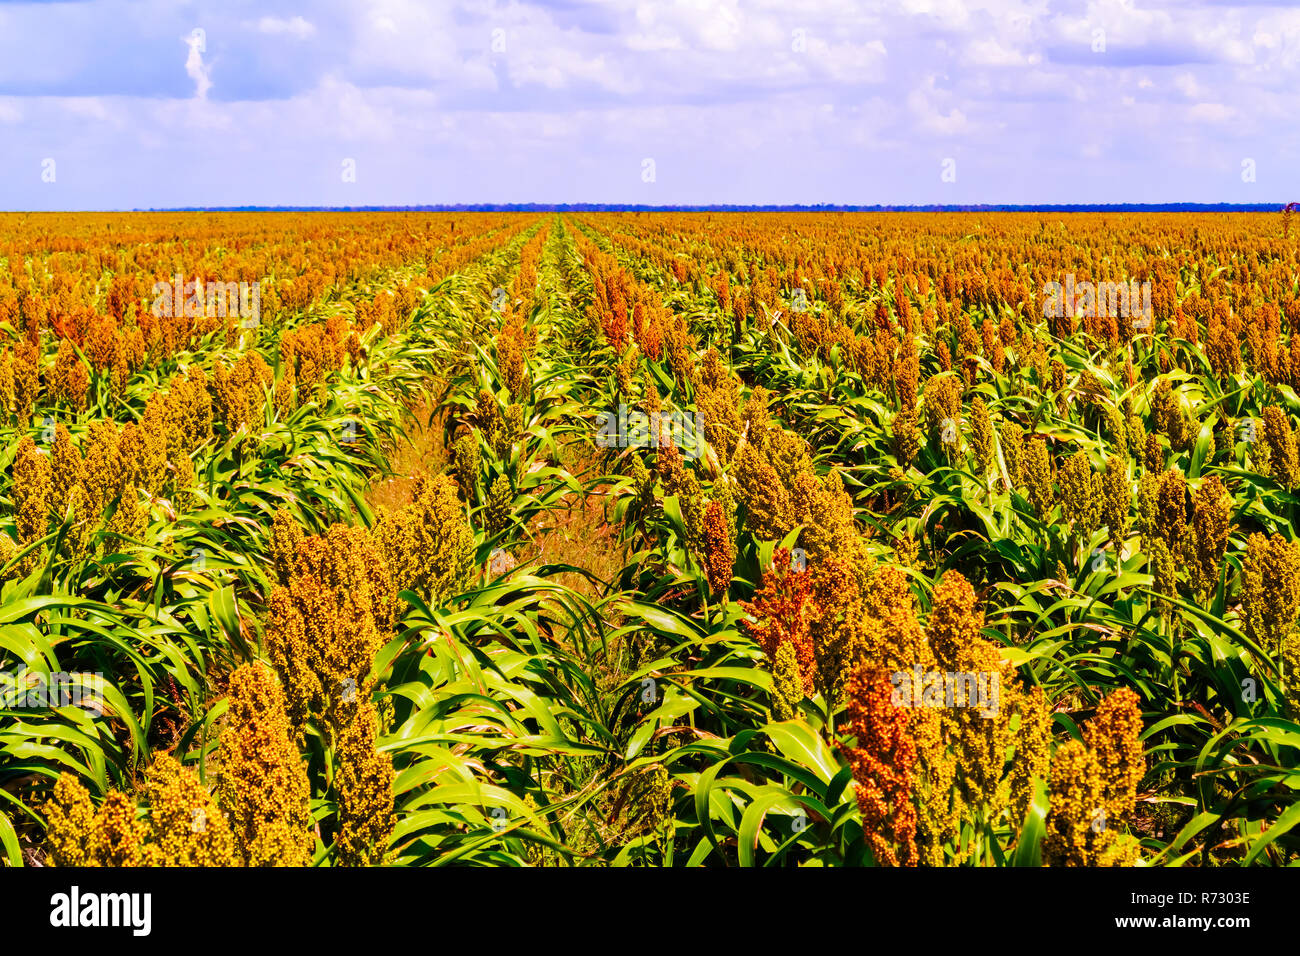

# **INTRODUCTION**

The Karamoja sub-region, commonly known as Karamoja, is a region in Uganda. It covers an area of 27,528km and comprises the Kotido District, Kaabong District, Karenga District, Nabilatuk District, Abim District, Moroto District, Napak District, Amudat District and Nakapiripirit District.

BUSINESS OVERVIEW



Dalberg Data Insights (DDI) is collaborating with NGOs in Karamoja to enhance food security monitoring through data-driven insights. The methodology developed by DDI’s agri-tech team involves using satellite images to estimate crop yields for sorghum and maize, the two main staple crops in the region. The model has already been tested for the 2017 crop season, providing a foundation for further development.

The next step in this initiative is to create an interactive visualiza






DATA UNDERSTANDING

In the two datasets that i will use that is:

Karamoja district crop yield population

Karamoja subcounty crop yield population

we will find that the data is both categorical and numerical. During my data cleaning because of the data nature i will use both mean and mode for filling the missing values by the .fillna() method.

Below are the components of the above data:

Subcounty name

District name

POP: total population for the subcounty

Area

S_Yield_Ha: average yield for

**IMPORTATION OF LIBRARIES**



First we begin by importing various libraries using the codes below.

In [ ]:
import numpy as np
import pandas as pd


**LOADING DATA**



These lines of code load two different datasets into pandas DataFrames with the first column of each CSV file serving as the row index. After this, you can manipulate, analyze, and visualize the data in df1 and df2 as needed for your project.

In [ ]:
 df1 = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv', index_col=0)
df2 = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv', index_col=0)


**THE SHAPE TO OUR DATAFRAME**



If you run [df1.shape, df2.shape], you will get a list containing the shape of both DataFrames. This helps in quickly understanding the size of your datasets.

In [ ]:
[df1.shape,df2.shape]

[(7, 10), (52, 12)]

**VIEWING THE DATA**



These commands provide an initial overview of the data in df1 and df2. You get insights into the structure, data types, presence of missing values, and the statistical distribution of numerical columns. This is a standard procedure when starting any analysis to understand the content and quality of the datasets.

In [ ]:
# Check the first few rows of each DataFrame
print(df1.head())
print(df2.head())

# Get information about the data (column names, data types, non-null counts)
print(df1.info())
print(df2.info())

# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Describe the statistics of the numerical columns
print(df1.describe())
print(df2.describe())


             NAME     POP        Area  S_Yield_Ha  M_Yield_Ha  Crop_Area_Ha  \
OBJECTID                                                                      
92           ABIM   90385  2771977106         449        1040   5470.068394   
96         AMUDAT  101790  1643582836         205        1297   5765.443719   
20        KAABONG  627057  7373606003         279         945  28121.672530   
85         KOTIDO  243157  3641539808         331        1148  53032.649450   
5          MOROTO  127811  3570160948         128         355   5954.814048   

             S_Area_Ha    M_Area_Ha  S_Prod_Tot  M_Prod_Tot  
OBJECTID                                                     
92         3277.295971  1848.621855     1471506     1922567  
96         2973.423860  2733.661014      609552     3545558  
20        20544.194960  7394.416334     5731830     6987723  
85        50247.443900  1751.372284    16631904     2010575  
5          4741.748776  1190.050606      606944      422468  
            

**COMBINING DATASETS**




This code is useful when you need to combine two datasets but aren't sure if they have columns in common. It automatically detects common columns and merges the datasets, allowing you to consolidate related data.


Example Scenario:

*Suppose df1 contains district-level data, and df2 contains subcounty-level data, and both DataFrames have a column called "district_name". This code will find that column and merge the two DataFrames based on it. If the column doesn't exist in both DataFrames, it will notify you that no common columns were found.

In [ ]:
# Checking for common columns that could be used for merging
common_columns = list(set(df1.columns).intersection(set(df2.columns)))

if common_columns:
    print(f"Common columns: {common_columns}")

    # Use the first common column for merging (modify if you have a preferred column)
    key_column = common_columns[0]

    # Merging the datasets on the common key column
    merged_df = pd.merge(df1, df2, on=key_column, how='inner')

    # Display the first few rows of the merged dataset
    print(f"DataFrames merged successfully on column: {key_column}")
    print(merged_df.head())
else:
    print("No common columns found for merging.")


Common columns: ['M_Area_Ha', 'S_Prod_Tot', 'M_Yield_Ha', 'Crop_Area_Ha', 'POP', 'S_Area_Ha', 'M_Prod_Tot', 'Area', 'S_Yield_Ha']
DataFrames merged successfully on column: M_Area_Ha
Empty DataFrame
Columns: [NAME, POP_x, Area_x, S_Yield_Ha_x, M_Yield_Ha_x, Crop_Area_Ha_x, S_Area_Ha_x, M_Area_Ha, S_Prod_Tot_x, M_Prod_Tot_x, SUBCOUNTY_NAME, DISTRICT_NAME, POP_y, Area_y, Karamoja, S_Yield_Ha_y, M_Yield_Ha_y, Crop_Area_Ha_y, S_Area_Ha_y, S_Prod_Tot_y, M_Prod_Tot_y]
Index: []

[0 rows x 21 columns]


**FIRST 5  ROWS**



Running this code will display the first 5 rows of the combined DataFrame. If there are columns that don't have corresponding values across the DataFrames, you will see NaN where data is missing.

In [ ]:
# Combining the DataFrames using an outer join
combined_df = pd.merge(df1, df2, how='outer')

# Display the first few rows of the combined DataFrame
print(combined_df.head())


      NAME     POP        Area  S_Yield_Ha  M_Yield_Ha  Crop_Area_Ha  \
0     ABIM   90385  2771977106       449.0      1040.0   5470.068394   
1   AMUDAT  101790  1643582836       205.0      1297.0   5765.443719   
2  KAABONG  627057  7373606003       279.0       945.0  28121.672530   
3   KOTIDO  243157  3641539808       331.0      1148.0  53032.649450   
4   MOROTO  127811  3570160948       128.0       355.0   5954.814048   

      S_Area_Ha    M_Area_Ha  S_Prod_Tot  M_Prod_Tot SUBCOUNTY_NAME  \
0   3277.295971  1848.621855   1471506.0   1922567.0            NaN   
1   2973.423860  2733.661014    609552.0   3545558.0            NaN   
2  20544.194960  7394.416334   5731830.0   6987723.0            NaN   
3  50247.443900  1751.372284  16631904.0   2010575.0            NaN   
4   4741.748776  1190.050606    606944.0    422468.0            NaN   

  DISTRICT_NAME Karamoja  
0           NaN      NaN  
1           NaN      NaN  
2           NaN      NaN  
3           NaN      NaN  
4    

<ipython-input-11-4d6c505bc128>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  combined_df = pd.merge(df1, df2, how='outer')


**MISSING DATA**



This approach is useful when you have missing data in numeric columns, and you want to replace those missing values with a sensible estimate (in this case, the mean of the column).



In [ ]:
# filling the missing values in the column region with mean for numeric value
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())



This approach works well for categorical or object-type data. If a column has multiple modes (i.e., more than one value appears with the highest frequency), mode().iloc[0] will return the first mode.

In [ ]:
# filling missing values for non-numeric columns
non_numeric_columns = combined_df.select_dtypes(exclude=[np.number]).columns
combined_df[non_numeric_columns] = combined_df[non_numeric_columns].fillna(combined_df[non_numeric_columns].mode().iloc[0])

**HANDLING MISSING VALUES**



The purpose of the code is to handle missing values in non-numeric columns of a DataFrame by replacing them with the most frequent value (the mode) for each column.

When dealing with datasets that have missing data, especially in non-numeric columns (e.g., strings, categories), imputing missing values is necessary to ensure the dataset is complete and can be used for further analysis or modeling. Filling the missing values with the mode helps maintain the most common characteristic in the data, which can be more representative than arbitrary methods like filling with a placeholder or dropping rows.

This technique is particularly useful in situations where non-numeric columns represent categorical data, like customer preferences, product categories, or any other attribute with a finite set of

In [ ]:
# saving the combined dataset
combined_df.to_csv('Karamoja_combined_df.csv', index=False)

**VIEWING THE DATASET**



This is generally done as an initial step after loading data to understand what the dataset looks like and to ensure the read operation worked as expected.

In [ ]:
df3=pd.read_csv('/content/Karamoja_combined_df.csv')
df3.head()

,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,SUBCOUNTY_NAME,DISTRICT_NAME,Karamoja
0,ABIM,90385,2771977106,449.0,1040.0,5470.068394,3277.295971,1848.621855,1471506.0,1922567.0,ABIM,KAABONG,Y
1,AMUDAT,101790,1643582836,205.0,1297.0,5765.443719,2973.423860,2733.661014,609552.0,3545558.0,ABIM,KAABONG,Y
2,KAABONG,627057,7373606003,279.0,945.0,28121.672530,20544.194960,7394.416334,5731830.0,6987723.0,ABIM,KAABONG,Y
3,KOTIDO,243157,3641539808,331.0,1148.0,53032.649450,50247.443900,1751.372284,16631904.0,2010575.0,ABIM,KAABONG,Y
4,MOROTO,127811,3570160948,128.0,355.0,5954.814048,4741.748776,1190.050606,606944.0,422468.0,ABIM,KAABONG,Y



This code helps to retrieve the dimensions of the DataFrame df3. It returns a tuple representing the number of rows and columns in the DataFrame.

In [ ]:
df3.shape

(59, 13)



This code generates summary statistics of the numerical columns in the DataFrame df3.



In [ ]:
df3.describe()

,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,59.000000,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,5.900000e+01
mean,51003.542373,9.398630e+08,273.586459,945.703334,5005.479412,3971.642595,945.343375,1.156108e+06,9.695461e+05
std,87994.178609,1.338079e+09,117.624497,319.200199,8668.593760,7654.205284,1570.917869,2.483804e+06,1.655393e+06
min,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,16721.000000,1.901488e+08,170.240064,757.082394,998.266305,533.066508,92.508396,1.466574e+05,7.862814e+04
50%,26644.000000,4.997769e+08,279.000000,1030.064093,2008.068169,1550.944570,358.550335,3.397606e+05,3.069518e+05
75%,43618.000000,1.048900e+09,361.945262,1211.009291,5616.531290,3216.917338,957.467889,9.664307e+05,9.700422e+05
max,627057.000000,7.373606e+09,560.313070,1396.991494,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06




This code provide a concise summary of the DataFrame df3. This method displays information such as:

 1.Number of rows and columns: The total size of the DataFrame.

 2.Column names: All the column names in the DataFrame.

3.Non-null count: The number of non-null (non-missing) entries in each column.

 4.Data types: The data type of each column (e.g., int64, float64, object, etc.).

 5.Memory usage: The amount of memory used by the DataFrame.

This method is helpful for quickly understanding the structure of the DataFrame, identifying missing values, and determining data types. It's often used in the initial stages of data analysis.

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            59 non-null     object 
 1   POP             59 non-null     int64  
 2   Area            59 non-null     int64  
 3   S_Yield_Ha      59 non-null     float64
 4   M_Yield_Ha      59 non-null     float64
 5   Crop_Area_Ha    59 non-null     float64
 6   S_Area_Ha       59 non-null     float64
 7   M_Area_Ha       59 non-null     float64
 8   S_Prod_Tot      59 non-null     float64
 9   M_Prod_Tot      59 non-null     float64
 10  SUBCOUNTY_NAME  59 non-null     object 
 11  DISTRICT_NAME   59 non-null     object 
 12  Karamoja        59 non-null     object 
dtypes: float64(7), int64(2), object(4)
memory usage: 6.1+ KB


**RECOMMENDATIONS**


1. Data Quality: Ensure the reliability and accuracy of the data source


2. External Factors: Consider external factors (e.g., climate change, policy changes) that might influence crop yields.

3. Data Privacy: Handle sensitive data (e.g., personal information) ethically and in compliance with regulations.

By following these recommendations, you can gain valuable insights into the relationship between crop yields, population, and other factors in the Karamoja region, which can inform policy decisions and agricultural development efforts.